# Plot model fit comparisons for simulation analysis 1

In [1]:
import os
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mindstorm import statplot
from dcmr import framework
from dcmr import figures
from dcmr import reports

fit_dir = Path(os.environ['CFR_FITS']) / 'merge'
fig_dir = Path(os.environ['CFR_FIGURES']) / 'sim1'
os.makedirs(fig_dir, exist_ok=True)
figures.set_style()

## Load model fits

In [2]:
included_models = ['I', 'C', 'D', 'IC', 'ID', 'CD', 'ICD']
models, model_names = framework.get_sim_models('cfr2', 'set1', included=included_models)
xval = framework.read_model_xvals(fit_dir, models, model_names)

In [3]:
xval.groupby('model')['logl_test_list'].mean().sort_values()

model
C     -33.293027
I     -32.215023
D     -32.112514
CD    -31.745599
ID    -31.026398
IC    -30.578863
ICD   -30.477753
Name: logl_test_list, dtype: float64

LINO NOT subset; don't know how to subset; dropped


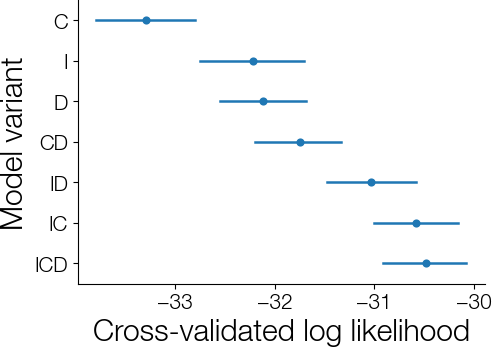

In [4]:
# plot cross-validation log-likelihood with within-subject error
g = figures.plot_xval_comp(xval, aspect=1.3, height=4)
g.savefig(fig_dir / 'model_comp_xval.pdf')
None

In [5]:
dark = sns.color_palette(
    'ch:start=1, rot=1.5, light=.7, dark=.3, gamma=1, hue=.5'
)
dark

[(0.7689335648950519, 0.6824396172757954, 0.6240123846554909),
 (0.7250187127782463, 0.5677430873950093, 0.6103083104698684),
 (0.623013021104788, 0.4855809829815538, 0.6161810850461853),
 (0.464634733019296, 0.4332443294049108, 0.5801730795425324),
 (0.31355069957273196, 0.3965359745123169, 0.4760973803152319),
 (0.2050147315167219, 0.34168808481661433, 0.31762490490999895)]

In [6]:
light = sns.color_palette(
    'ch:start=1, rot=1.5, light=.7, dark=.3, gamma=.5, hue=1'
)
light

[(0.9248203983802259, 0.8124754066629261, 0.7365856230946308),
 (0.9370151046580671, 0.7134152392755648, 0.773930517001042),
 (0.8638347057562072, 0.6485629096614572, 0.8531332480304541),
 (0.6875944308206159, 0.6323388125763083, 0.8909732355818533),
 (0.4826946089121227, 0.6491392670198295, 0.8087166257388984),
 (0.325484389760949, 0.649366831333291, 0.5923429764853889)]

## Context component weights

In [7]:
model_name = 'ICD'
model = models[model_names.index(model_name)]
fit = framework.read_model_fits(fit_dir, [model], [model_name])
param = fit[['w_loc', 'w_cat', 'w_use']].droplevel('model')
df = pd.melt(
    param.reset_index(),
    id_vars='subject',
    value_name='Weight',
    var_name='Component',
)

/Users/morton/PycharmProjects/dcmr/.venv/lib/python3.12/site-packages/mindstorm/statplot.py:188: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.stripplot(data=data, x=x, y=y, hue=hue, ax=ax, **point_prop, **kwargs)
/Users/morton/PycharmProjects/dcmr/.venv/lib/python3.12/site-packages/mindstorm/statplot.py:203: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.barplot(data=data, x=x, y=y, hue=hue, ax=ax, **bar_prop, **kwargs)
LINO NOT subset; don't know how to subset; dropped


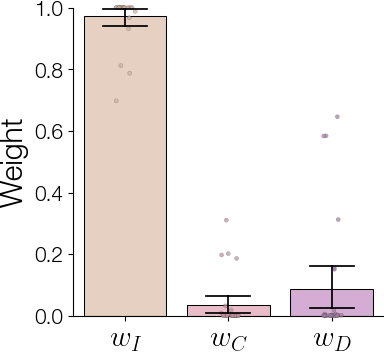

In [8]:
fig, ax = plt.subplots(figsize=(4, 4))
g = statplot.plot_swarm_bar(
    data=df.reset_index(),
    x='Component',
    y='Weight',
    hue='Component',
    point_kind='strip',
    point_kws={'clip_on': False},
    dark=dark,
    light=light,
    ax=ax,
)
ax.set(ylim=(0, 1), ylabel='Weight');
ax.set_xticks([0, 1, 2], ['$w_I$', '$w_C$', '$w_D$'], usetex=True)
fig.savefig(fig_dir / 'weights.pdf')

## Create a parameter table

In [9]:
table, orig = reports.create_model_table(fit_dir, models, model_names, model_comp='xval')
table.to_latex(fig_dir / 'parameters1.tex', escape=False)
table

,I,C,D,IC,ID,CD,ICD
$\phi_s$,0.53 (0.08),0.11 (0.02),0.36 (0.03),0.03 (0.01),0.08 (0.02),0.13 (0.01),0.03 (0.01)
$\phi_d$,1.48 (0.15),1.30 (0.17),2.84 (0.18),1.74 (0.18),1.63 (0.16),2.84 (0.18),1.72 (0.17)
$\beta_{\mathrm{enc}}$,0.70 (0.02),0.27 (0.04),0.76 (0.01),0.52 (0.03),0.61 (0.02),0.75 (0.01),0.54 (0.02)
$\beta_{\mathrm{start}}$,0.49 (0.05),0.00 (0.00),0.01 (0.01),0.66 (0.05),0.68 (0.05),0.02 (0.01),0.62 (0.05)
$\beta_{\mathrm{rec}}$,0.83 (0.01),0.96 (0.01),0.91 (0.01),0.93 (0.01),0.90 (0.01),0.95 (0.01),0.93 (0.01)
$\theta_s$,0.01 (0.00),0.01 (0.00),0.01 (0.00),0.01 (0.00),0.01 (0.00),0.01 (0.00),0.01 (0.00)
$\theta_r$,0.32 (0.01),0.32 (0.01),0.32 (0.01),0.32 (0.01),0.32 (0.01),0.32 (0.01),0.32 (0.01)
$w_1$,---,---,---,0.96 (0.01),0.85 (0.03),0.10 (0.01),0.96 (0.01)
$w_2$,---,---,---,---,---,---,0.13 (0.03)
$\tau$,0.15 (0.02),0.35 (0.04),0.28 (0.00),0.09 (0.02),0.10 (0.02),0.36 (0.01),0.12 (0.02)


In [10]:
%load_ext watermark
%watermark -v -iv

Python implementation: CPython
Python version       : 3.12.10
IPython version      : 9.5.0

pandas    : 2.3.2
dcmr      : 1.0.0a0
seaborn   : 0.13.2
mindstorm : 0.11.2
matplotlib: 3.10.5

